# Foundations of Data Science
## Week 04: Data representation II: Distributions and Seaborn

**Formative exercise on visualisation:** This year we have produced a formative exercise on visualisation (not for credit; 0% of course assessment) that you can do in the lab time or afterwards, and which we will mark and give feedback on:

https://github.com/Inf2-FDS/FDS-S1-04-visualisation-exercise

This exercise should help you with Coursework 1. We will mark submissions received by the deadline of Friday 11 October, 16:00 by the end of Week 5, before we release CW1. We will also accept late submissions until Friday 18 October, 16:00. There are no penalties for late submissions, but we cannot guarantee that we will mark late submissions before the start of CW1.

**Learning outcomes:** 
In this lab you will learn more advanced plotting options using Matplotlib, and Seaborn, a different plotting library based on Matplotlib.  By the end of the lab you should be able to:
- represent distributions using Matplotlib,
- draw figures with differently sized subplots,
- represent multivariate distributions using Seaborn.

After examining CO<sub>2</sub> emission data and having reached a tentative answer on who is responsible for the current state of CO<sub>2</sub> in the atmosphere, we will take the position of a medical researcher, and try to answer the following question:

**Research question:** What are the most important factors leading to diabetes?

**Data information:** We are using a well-known [UCI](https://www.kaggle.com/uciml/pima-indians-diabetes-database) dataset of female patients over 21 years old and of Pima Indian heritage.

**Remarks:**
- Remember to think about what you learned in the last lab and the <a href="https://opencourse.inf.ed.ac.uk/inf2-fds/resource-list">FDS Visualisation Principles and Guidance</a>:
  1. Show the data
  2. Make the meaning of the data clear
  3. Avoid distorting what the data have to say
  4. Make the data accessible
  5. Focus on the content
- For some exercises, you might need to use the Matplotlib documentation or a search engine - the [Tutorials](https://matplotlib.org/3.7.2/tutorials/index.html) and [API reference](https://matplotlib.org/3.7.2/api/index.html) are the most useful sections. It is important to learn how to solve problems by searching online. Throughout your career, you will encounter many problems that other people have encountered too; there is no need to reinvent the wheel.
- We will not provide all the code in the tutorials, but expect you to be able to draw from previous labs to fill in gaps.
- Try not to use copy+paste when coding these labs, as typing will help you memorize the code better.
- Try to understand each detail in the code we provide, and read the comments!

In [1]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D
import math
# Package to display the hints and soultions
from common.show_solutions import show

## A Plotting distributions: Histograms and Boxplots

In the last lab, we learned to represent data using line plots, bar charts and scatter plots. In this lab, we will focus on representing distributions.

In [2]:
diabetes_loc = os.path.join(os.getcwd(), 'datasets', 'diabetes.csv')
diabetes = pd.read_csv(diabetes_loc)
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


The `Outcome` column represents whether or not the patient has diabetes.

### A.1 HIstograms

There are many options to represent distributions. A common choice is the **histogram**. In Matplotlib we can create histograms using `plt.hist(data, bins)`, where `bins` is either an integer representing the number of bins, e.g. 10, or an array of the limits of the bins, e.g. `[0, 10, 20, 30]`. Let's get an idea about whether the dataset is a good representation of the actual population by creating a histogram of the ages of the female patients.

Text(0.5, 1.0, 'Distribution of ages of female patients')

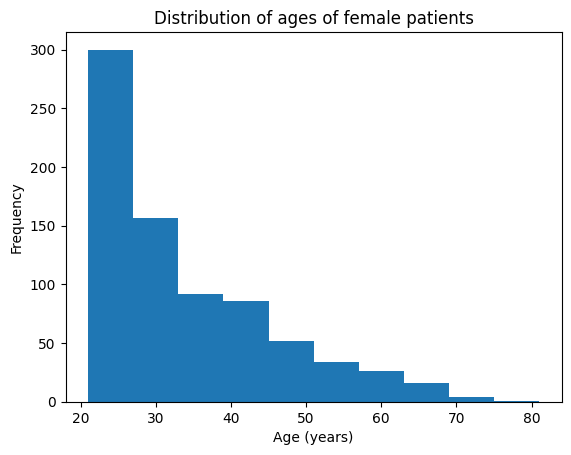

In [3]:
plt.hist(diabetes['Age'], 10)
plt.xlabel('Age (years)') # Make the meaning of the data clear
plt.ylabel('Frequency') # Make the meaning of the data clear
plt.title('Distribution of ages of female patients') # Make the meaning of the data clear

**Discussion:** In many cases, one expects a normal distribution (sometimes referred to as a Gaussian distribution), when looking at a distribution of a variable from a whole population, e.g. height, IQ or body mass index. However, this is not the case above. Discuss with your lab partner why the above distribution might still be a good representation of the true distribution. Write down your answers:

In [4]:
# Run this cell to be offered with hints and solution
show(week=4, question=0)

Your answer:


**Exercise 01:** 

- Fix the histogram from above to use the same ranges for the bins as [18, 25, 35, 45, 55, 65, 75].
- Discuss with your lab partner whether the age distribution of the data set we use is a good approximation of the real distribution.


In [5]:
# Run this cell to be offered with hints and solution
show(week=4, question=1)

In [ ]:
# Your code


A well known fact is that people who are obese, defined as a body mass index (BMI) greater or equal to 35, are more likely to get diabetes. Let's double check that.

**Exercise 02:** 

a) Split the dataset into two sub sets `diabetes_true` and `diabetes_false`, one containing all the patients with diagnosed diabetes and the other one the rest.

b) Create a figure with two subplots: (1) a histogram of the BMI distribution of `diabetes_true`; and (2) a histogram of the BMI distribution of `diabetes_false`. Play around with the number of bins; try to find a number that shows the distribution well. You might also want to compare plotting density (`density=True`) as opposed to frequency.

In [6]:
# Run this cell to be offered with hints and solution
show(week=4, question=2)

In [ ]:
# Your code


### A.2 Boxplots

Another option to represent distributions is the **boxplot** `plt.boxplot(data)`. Boxplots (also known as box and whisker plots) are one-dimensional representations of a distribution in which the box extends from the lower (first) to the upper (fourth) quartile values of the data, while the line across the box represents the median. The 'whiskers', the lines extending from the box, can represent different things, as described on the [Wikipedia article on boxplots](https://en.wikipedia.org/wiki/Box_plot). By default, Matplotlib defines the end of the upper whisker as the value of the largest data point that lies within 1.5 times the interquartile range from the upper quartile, and the lower whisker as the value of the smallest data point that lies within 1.5 times the interquartile range from the lower quartile. Data points that lie outwith the whiskers are called outliers, and are represented by dots or circles. Since the whiskers can represent multiple statistics, ideally their meaning should be indicated in the plot caption.

**Exercise 03:**

a) Compute the upper and lower quartile, the median, the interquartile range, the mean, and the standard deviation of `diabetes_true['BMI']`, using functions from the pandas library.

b) (Optional) You may want to compare these results with writing your own code to generate. (Hint: You might get slightly different results depending on which definition of quartiles you use.)

In [10]:
# Run this cell to be offered with hints and solution
show(week=4, question=3)

In [ ]:
# Your code


Now that we have computed those values, let's redraw the BMI distribution from above using a boxplot.

In [ ]:
bmi = np.array([diabetes_true['BMI'], diabetes_false['BMI']], dtype=object)
plt.boxplot(bmi, labels=['Patients diagnosed with diabetes', 'Patients not diagnosed with diabetes'])
plt.ylabel('BMI')
plt.title('BMI of female patients with and without diabetes')
# Remark: the input is an array of arrays; each array returns one boxplot.
plt.show()

Note that in Exercise 02 we used two subplots to represent the different distributions. Boxplots allow us to represent both distributions in one plot.
Suppose we want to communicate this data in a publication, but we don't want the plot to take up too much space.  

**Exercise 04:** 
Make the plot so that it is 4 inches wide and 2 inches high. You will need to rotate the labels of the plot so they don't overlap using `plt.xticks` and its `rotataion` and `ha` arguments. Try to find an angle that prevents the text overlapping and minimises the space taken below the figure.

In [11]:
# Run this cell to be offered with hints and solution
show(week=4, question=4)

In [ ]:
# Your code


Now that we have seen that higher BMI is associated with diabetes, let us consider how pregnancy affects a woman's likelihood of getting diabetes.

**Exercise 05:** 

a) Split the two datasets (`diabetes_true` and `diabetes_false`) into 12 subsets, dependent on how often the women were pregnant, i.e. 0 pregnancies, 1 pregnancy, ... 11 pregnancies, >11 pregnancies. Store all 12 subsets in one array (`bmi_pregnancy_diabetes_true`, `bmi_pregnancy_diabetes_false`).

b) Plot a figure with two subplots, each showing 12 distributions of the BMI, dependent on how often the women were pregnant. One plot should be drawn based on the distributions from the set of women in `diabetes_true` and the other based on the distributions from the set of women in `diabetes_false`.

c) Does pregnancy have an effect on the probability of having diabetes?

In [12]:
# Run this cell to be offered with hints and solution
show(week=4, question=5)

In [ ]:
# Your code


**Discussion:** Boxplots represent distributions in a very simplified manner. Discuss with your lab partner when and how a box plot could misrepresent information. What would be an example of a distribution that would be badly represented by a boxplot? Write down your answer:

In [13]:
# Run this cell to be offered with hints and solution
show(week=4, question=5.1)

Your answer:


## B Two-dimensional historgrams

Above we have plotted different BMI distributions dependent on how many pregnancies the women had. Of course, the number of pregnancies in the population is also a distribution. The next step would be to combine those two dimensions into one histogram. A 2D histogram can be represented as a *heatmap*, plotted using the function `hist2d(x, y, bins)`. A heatmap comprises 2D-array of coloured rectangles, one for each combination of bins in the x and y axes. The colour of each rectangle represents the number of data points falling within the bin. Let's plot the joint distribution of BMI and pregnancies. 

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 5))

# Set the bins to be the same for both histograms
xbins = np.arange(-0.5, 15, 1)
ybins = np.arange(-0.5, 70, 2)

# Patients with diabetes
# h1 = histogram 1. we need to save the output to add colorbar later on. 
# We could also plot without colorbar.
h1 = ax1.hist2d(diabetes_true[diabetes_true['Pregnancies']<12]['Pregnancies'], # x value of data point
                diabetes_true[diabetes_true['Pregnancies']<12]['BMI'], # y value of data point
                [xbins, ybins], # number of bins [x, y]
                density=True
              )
ax1.set_title('Diagnosed with diabetes')
ax1.set_ylabel('BMI')
ax1.set_xlabel('Number of pregnancies')
# Let's add a legend to understand what the colour means
fig.colorbar(h1[3], ax=ax1, location='bottom')

# Patients without diabetes
h2 = ax2.hist2d(diabetes_false[diabetes_false['Pregnancies']<12]['Pregnancies'],
               diabetes_false[diabetes_false['Pregnancies']<12]['BMI'],
               [xbins, ybins],
               density=True
              )
ax2.set_title('Not diagnosed with diabetes')
#ax2.set_ylabel('BMI')
ax2.set_xlabel('Number of pregnancies')
fig.colorbar(h2[3], ax=ax2, location='bottom')

## C Gridspaces

In the last lab, we discussed how to create a figure with several subplots. However, all subplots had the same size. How can we recreate the figure below?
![title](https://matplotlib.org/3.1.1/_images/sphx_glr_gridspec_003.png)
From the [matplotlib documentation](https://matplotlib.org/3.1.1/_images/sphx_glr_gridspec_003.png).

When we use `.subplots(nrows,mcols, figsize)` Matplotlib actually creates a figure with size `figsize`, and then overlays an equally spaced grid with n rows and m columns. We can use that grid and spread an axes over several columns and rows.

In [ ]:
multiplot_fig = plt.figure(constrained_layout=True)
grid = multiplot_fig.add_gridspec(3, 3)
ax1 = multiplot_fig.add_subplot(grid[0, :])
ax1.set_title('grid[0, :]')
ax2 = multiplot_fig.add_subplot(grid[1, :-1])
ax2.set_title('grid[1, :-1]')
ax3 = multiplot_fig.add_subplot(grid[1:, -1])
ax3.set_title('grid[1:, -1]')
ax4 = multiplot_fig.add_subplot(grid[-1, 0])
ax4.set_title('grid[-1, 0]')
ax5 = multiplot_fig.add_subplot(grid[-1, -2])
ax5.set_title('grid[-1, -2]')

Let's use this to our advantage. To illustrate better the two dimensional histogram above, let's add a figure on the side and below, representing the distribution of BMI and pregnancies independent of other data, i.e. the projection of the 2D plot onto one dimension.

In [ ]:
multiplot_fig = plt.figure(constrained_layout=True, figsize = (5,5))
grid = multiplot_fig.add_gridspec(3, 3)
ax1 = multiplot_fig.add_subplot(grid[:-1, :-1])
ax2 = multiplot_fig.add_subplot(grid[2, :-1])
ax3 = multiplot_fig.add_subplot(grid[:-1, 2])
h1 = ax1.hist2d(diabetes_true[diabetes_true['Pregnancies']<12]['Pregnancies'], # x vales of data points
                diabetes_true[diabetes_true['Pregnancies']<12]['BMI'], # y values of data points
                [12,50], # Number of bins in x and y directions
                density=True # Normalize data. Try with density = False and compare output
                )
ax1.set_ylabel('BMI')
ax1.set_xlabel('Number of pregnancies')
ax2.hist(diabetes_true[diabetes_true['Pregnancies']<12]['Pregnancies'], 12)
ax2.set_xlim([0, 11])
ax3.hist(diabetes_true[diabetes_true['Pregnancies']<12]['BMI'], 50, orientation="horizontal", range=(0, 70))
ax3.set_ylim([0, 67])

Great! You have learned enough in Matplotlib to draw many plots you will need in data visualization and, by extension, analytics. More importantly, you should have enough solid basic knowledge of Matplotlib to be able to  understand quickly the documentation or StackOverflow answers. Remember, if you copy+paste a solution from StackOverflow, you should always try to understand each line. Firstly, if you understand each line well you will remember the solution better and won't need to look it up next time. Secondly, anyone can post answers on StackOverflow, and often the answers proposed are not the cleanest option. Knowing the underlying basics of Matplotlib will help you to clean up messy answers and still use those in your code.

The last thing we will discuss is Seaborn, a different plotting library based on Matplotlib.

## D Seaborn

[Seaborn](https://seaborn.pydata.org/) is a plotting library that can produce good-looking plots with less code than Matplotlib. The documentation is quite extensive and the official website contains many [tutorials](https://seaborn.pydata.org/tutorial.html). In addition, if you are looking for example plots as inspiration this [website](https://seaborn.pydata.org/examples/index.html) contains many examples.

### D.1 Creating plots with less code
You can create all the types of plot encountered so far with Seaborn with much less effort than Matplotlib, for example histograms:

In [ ]:
plt.figure(figsize=(6, 3))
sns.histplot(diabetes_true['BMI'])

We can also add extra information to the plots. In the case of histograms, we can convert the histogram into a density plot by specifying `kde=True`. (KDE stands for [kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation) and gives a smoothed version of the plot.)

The Seaborn `displot` has more flexibility than the `histplot`, allowing us to add small lines at the bottom indicating each observation (`rug=True`). To see more options check the [documentation](https://seaborn.pydata.org/generated/seaborn.displot.html).

In [ ]:
sns.displot(diabetes_true['BMI'], kind='kde', rug=True)

Note that seaborn displots are square by default, since they are designed to be displayed in pairplots (see later). To make a displot of a particular size, we have to set the `height` in inches and set the width via the `aspect`: `width=aspect*height`.

In [ ]:
sns.displot(diabetes_true['BMI'], kind='kde', rug=True, height=4, aspect=6.0/4.0) # Gives a 6x4 plot

We can also draw the boxplots from Exercise 5 can be plotted the same way as in Matplotlib:

In [ ]:
sns.boxplot(data = bmi_pregnancy_diabetes_true)

Apart from the colours, and the style of the markers, there doesn't seem to be much difference to Matplotlib. We still need to add 2 lines of code to label the x and y axis. 

However, we can do better with this, and avoid the coding you had to do in Exercise 5. At the beginning of this lab, the data was is in DataFrame `diabetes`, where each row is one record - this is the __data matrix__ format, also known as [tidy data](https://en.wikipedia.org/wiki/Tidy_data) or sometimes __long form__ (see the Data chapter of the FDS Lecture Notes). In order to use Matplotlib, we had to transform it into a list of arrays. Seaborn lets us use the data matrix directly, by specifying the `x` and `y` variables and the `data` matrix.  

In [ ]:
diabetes_capped = diabetes.copy() # We make a copy just to avoid changing our data set
diabetes_capped = diabetes_capped[diabetes_capped['Pregnancies'] <= 11] # We cap the data set to only include the patients with maximum 11 pregnancies to have the same data as in the previous exercises
sns.boxplot(x='Pregnancies', y='BMI', data=diabetes_capped[diabetes_capped['Outcome'] == 1]) # Seaborn only needs one line in contrast to matplotlib

We've now saved many lines of code _and_ got the axes labelled for free _and_ avoided any potential errors with mislabelling the axes or during transformation from matrix form to arrays.

**Remark** Seaborn [makes it easier to choose colours that are distinguishable by people with colourblindness](https://seaborn.pydata.org/tutorial/color_palettes.html).   You should recall (according to the principle of "Focus on the content") that adding more colour does not always improve your plot. 

We can use colour to good effect by creating a plot in which we map the Outcome (Diabetes or no diabetes) onto the hue. We know how a plot that aids visual comparison, in line with the principle of "Show the data".

In [ ]:
sns.boxplot(x='Pregnancies', y='BMI', hue='Outcome', data=diabetes_capped)
plt.title('Distribution of BMI by number of pregnancies')
plt.show()

### D.2 Extra plots

Seaborn does not just render labelled plots with less code, it also contains plots that are not present in Matplotlib. For example, above we have asked you to discuss what the problems might be with boxplots. You might have observed that they strongly simplify distributions and do not represent  bimodal distributions well. Violin plots can show in simple plots the distribution, while also preserving its form.

In [ ]:
plt.figure(dpi=150, figsize=(6,3))
sns.violinplot(x='Pregnancies', y='BMI', data=diabetes_capped[diabetes_capped['Outcome'] == 1])

In [ ]:
plt.figure(dpi=150, figsize=(6, 2))
sns.violinplot(x='Pregnancies', y='BMI', hue='Outcome', data=diabetes_capped, width=0.7, linewidth=0.7)

**Discussion:** Discuss with your lab partner what the advantages and disadvantages of boxplots and violin plots are.

In [14]:
# Run this cell to be offered with hints and solution
show(week=4, question=6)

Your answer:


The last plot we are going to discuss in this lab are **pairplots**. We have already seen them in the second lab to show the correlation between different *pairs* of dimensions. This is very helpful in data exploration: a pairplot can give a lot of information about the data, e.g.
- the shape of distributions of individual variables (e.g. approximately normal, skewed)
- correlations between variables
- anomalies in the data - for example unexpected zero values

However, large pairplots tend to have small labels, and are tend not to be suited to data communication.

In [ ]:
sns.pairplot(diabetes, hue='Outcome')

**Discussion:**

Discuss with your lab partner what you can see in the plot:

- Is there data, that should be cleaned before further analyzing it?
- Are there certain features that, by themselves, already predict whether someone is more likely to have diabetes?
- Can you make out clear dependencies between dimensions?

You have learned a lot about plotting and how plots should be presented. 

- How would you evaluate the plot above in terms of the visualisation principles?
- Is the plot above one that could be used in a presentation?
- How could we improve it?

In this lab, we have seen how to visualize distributions in data sets, and especially pairplots can tell us a lot about our data, before we process it. In the labs in week 7 and 8, we will come back to this data set and continue exploring it. Hopefully, we can extract features that allow us to predict patients susceptible to having diabetes, in order to answer fully our research question.

### Remarks regarding Matplotlib vs Seaborn

Whether you use Matplotlib or Seaborn in the course work is entirely up to you. The importance of Matplotlib lies in the fact that most researchers use Matplotlib, and Seaborn is built on top of it. Now you have the tools at your hand to use Matplotlib, you know what to search for in the documentation and on stackoverflow when you are stuck with a plotting problem, you can easily understand the answers people post on stackoverflow. On the other hand, understanding the inner-workings of Matplotlib will help you to also easily understand the Seaborn documentation. It is up to you to spend some extra time playing around with Seaborn. The next exercise is optional, but we highly recommend that you do it.

**Optional Exercise:**

Use Seaborn to recreate the plots you have plotted above, or in the previous lab.

Here is the documentation for the different plots:

- [Line plots](https://seaborn.pydata.org/generated/seaborn.lineplot.html)
- [Bar plots](https://seaborn.pydata.org/generated/seaborn.barplot.html)
- [Scatter plots](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)
- [Histograms](https://seaborn.pydata.org/generated/seaborn.distplot.html)
- [Box plots](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- [Heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [ ]:
# Your code

Remember the **formative exercise on visualisation** - see start of this Notebook.